## Simple linear regression

Generate the x points in a uniform way:

In [366]:
library(data.table)


n = 100

# generate the x points
x <- runif(n,-10,10)

Parameters of our model

In [367]:
a = 2
b = 3.5

sigma = 1.5

Generative model


In [368]:
y <- x*a + b + rnorm(n, 0, sd = sigma)

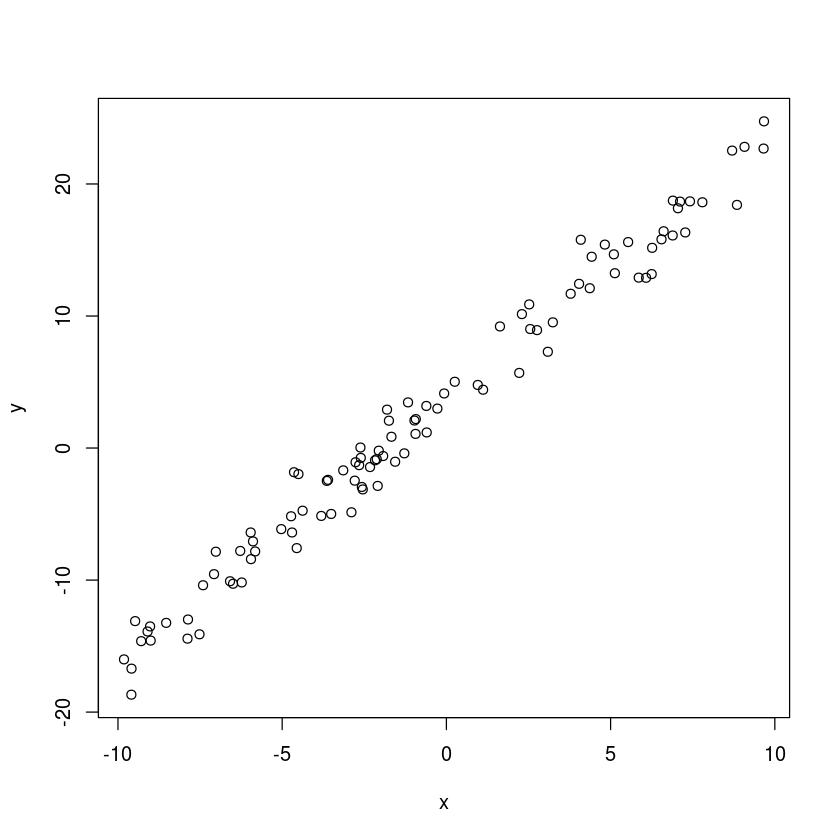

In [4]:
plot(x,y)


In [5]:
library(rstan)

stan_data = list(n = n,
                 x = x,
                 y = y)

fit <- stan("basic_linear_regression.stan", data = stan_data, chains = 2, 
            iter = 5000, warmup = 2000, thin = 10)

Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Warning message in readLines(file, warn = TRUE):
“incomplete final line found on '/home/guillermo/bayesian_excercise/bayesian-programming-exercises/linear_models/linear_regression.stan'”recompiling to avoid crashing R session



SAMPLING FOR MODEL 'linear_regression' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1: Iteration:  500 / 5000 [ 10%]  (Warmup)
Chain 1: Iteration: 1000 / 5000 [ 20%]  (Warmup)
Chain 1: Iteration: 1500 / 5000 [ 30%]  (Warmup)
Chain 1: Iteration: 2000 / 5000 [ 40%]  (Warmup)
Chain 1: Iteration: 2001 / 5000 [ 40%]  (Sampling)
Chain 1: Iteration: 2500 / 5000 [ 50%]  (Sampling)
Chain 1: Iteration: 3000 / 5000 [ 60%]  (Sampling)
Chain 1: Iteration: 3500 / 5000 [ 70%]  (Sampling)
Chain 1: Iteration: 4000 / 5000 [ 80%]  (Sampling)
Chain 1: Iteration: 4500 / 5000 [ 90%]  (Sampling)
Chain 1: Iteration: 5000 / 5000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.07039 seconds (Warm-up)
Chain 1:                0.135797 seconds (Sampling)
Chain 1:      

Distribution of the posterior sample:

In [6]:
print(fit, pars=c("a", "b", "sigma", "lp__"), probs=c(.1,.5,.9))


Inference for Stan model: linear_regression.
2 chains, each with iter=5000; warmup=2000; thin=10; 
post-warmup draws per chain=300, total post-warmup draws=600.

        mean se_mean   sd    10%    50%    90% n_eff Rhat
a       1.99    0.00 0.03   1.95   1.99   2.03   563    1
b       3.66    0.01 0.16   3.45   3.66   3.86   587    1
sigma   1.57    0.00 0.11   1.44   1.56   1.72   508    1
lp__  -94.73    0.05 1.21 -96.17 -94.36 -93.55   647    1

Samples were drawn using NUTS(diag_e) at Mon Dec 24 10:27:54 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


It's quite close to the real parameters:

ci_level: 0.8 (80% intervals)
outer_level: 0.95 (95% intervals)


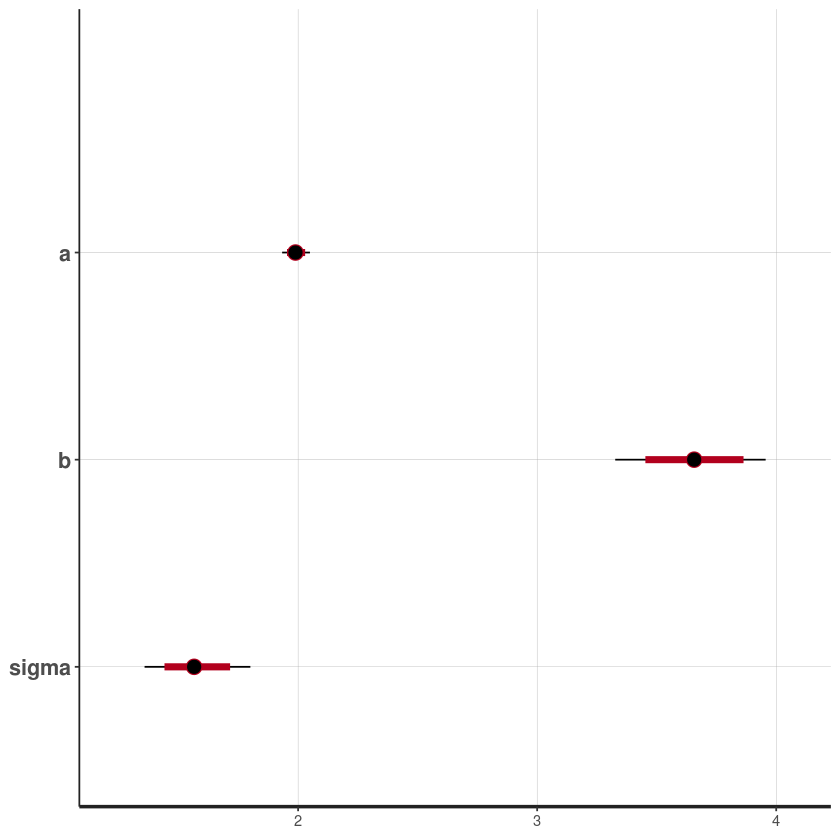

In [16]:
plot(fit)


Let's inspect visually the evolution of the chains:

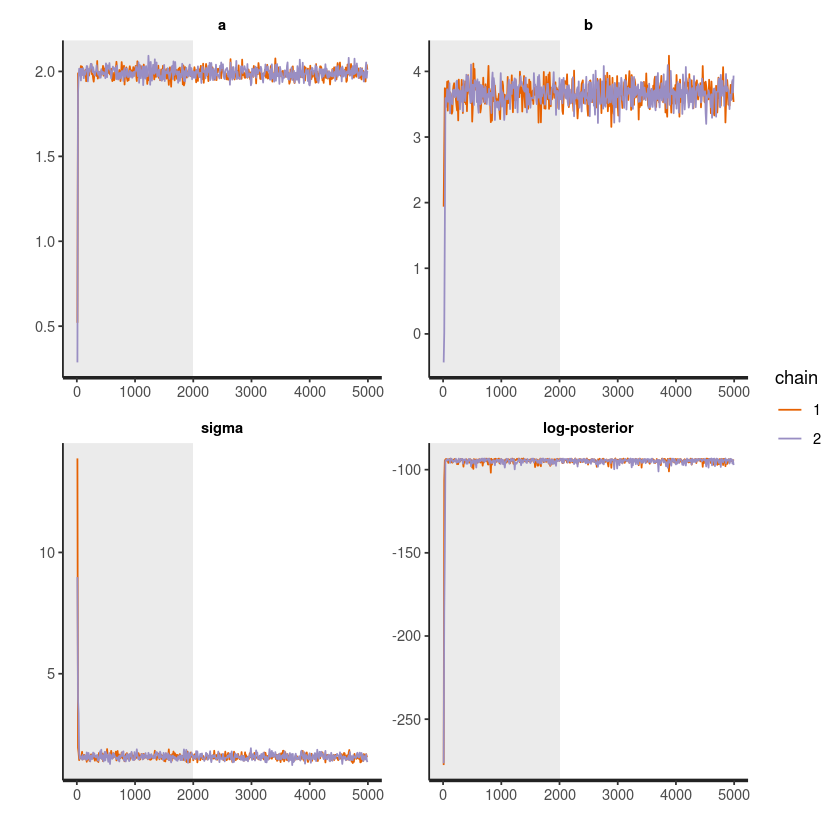

In [23]:
traceplot(fit, pars = c("a", "b","sigma","lp__"), inc_warmup = TRUE, nrow = 2)


The chains seems to be stable after the first iterations (that are in the warmup and therefore no considered in the posterior sample). Furthermore, both seem to converge to the same mode. Let's inspect some diagnostics about the convergence:

In [12]:
sampler_params <- get_sampler_params(fit, inc_warmup = TRUE)

In [13]:
# each chain separately
lapply(sampler_params, summary, digits = 2)

[[1]]
 accept_stat__       stepsize__     treedepth__   n_leapfrog__   divergent__
 Min.   :1.9e-05   Min.   :0.015   Min.   :1.0   Min.   : 1.0   Min.   :0   
 1st Qu.:8.4e-01   1st Qu.:0.754   1st Qu.:2.0   1st Qu.: 3.0   1st Qu.:0   
 Median :9.4e-01   Median :0.754   Median :2.0   Median : 3.0   Median :0   
 Mean   :8.6e-01   Mean   :0.848   Mean   :2.2   Mean   : 5.9   Mean   :0   
 3rd Qu.:9.9e-01   3rd Qu.:0.863   3rd Qu.:3.0   3rd Qu.: 7.0   3rd Qu.:0   
 Max.   :1.0e+00   Max.   :2.471   Max.   :5.0   Max.   :47.0   Max.   :0   
    energy__  
 Min.   : 94  
 1st Qu.: 95  
 Median : 96  
 Mean   : 97  
 3rd Qu.: 97  
 Max.   :476  

[[2]]
 accept_stat__    stepsize__      treedepth__   n_leapfrog__   divergent__
 Min.   :0.00   Min.   :0.0091   Min.   :1.0   Min.   : 1.0   Min.   :0   
 1st Qu.:0.83   1st Qu.:0.7677   1st Qu.:2.0   1st Qu.: 3.0   1st Qu.:0   
 Median :0.94   Median :0.7677   Median :2.0   Median : 3.0   Median :0   
 Mean   :0.86   Mean   :0.8470   Mean   :2.

The number of divergent transitions is 0. It seems like we could increase the `acceptance probability`. Finally, let's explore the posterior samples with more detail:

In [241]:
res <- as.data.table(fit)

In [18]:
head(res)

a,b,sigma,lp__
1.994156,3.594127,1.530493,-93.36942
2.025207,3.778590,1.540259,-94.13588
2.005213,3.599053,1.690103,-94.08440
1.978908,3.636190,1.498300,-93.45694
1.935937,3.398236,1.563608,-96.04011
2.007854,3.350890,1.687318,-95.88210


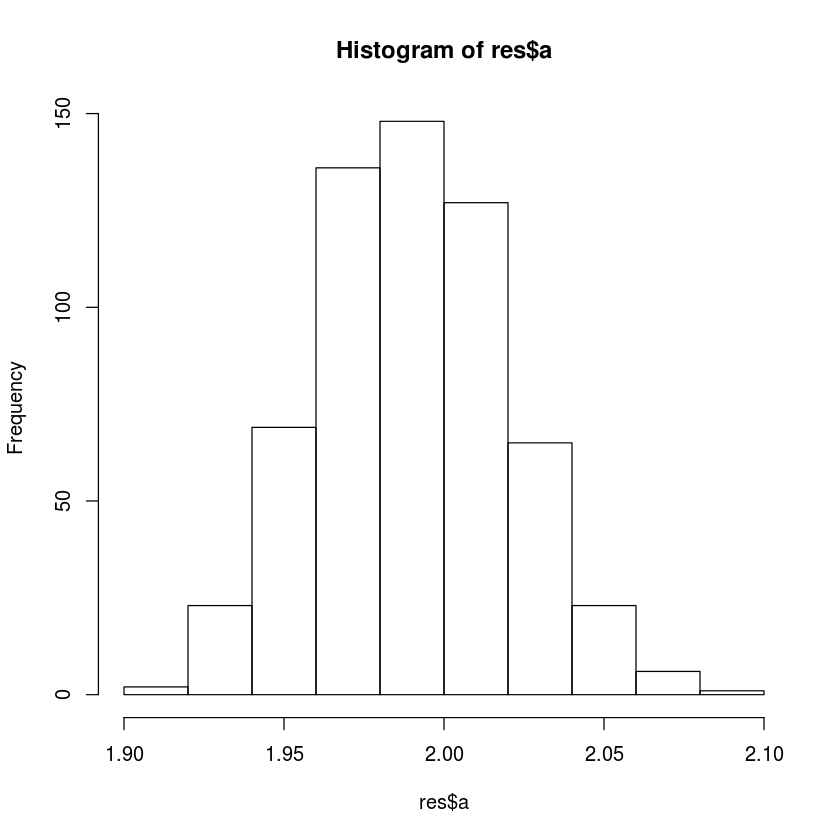

In [19]:
res <- as.data.table(fit)
hist(res$a)

In [20]:
tmp <- res[, c("a", "b", "sigma")]


Attaching package: ‘psych’

The following object is masked from ‘package:rstan’:

    lookup

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



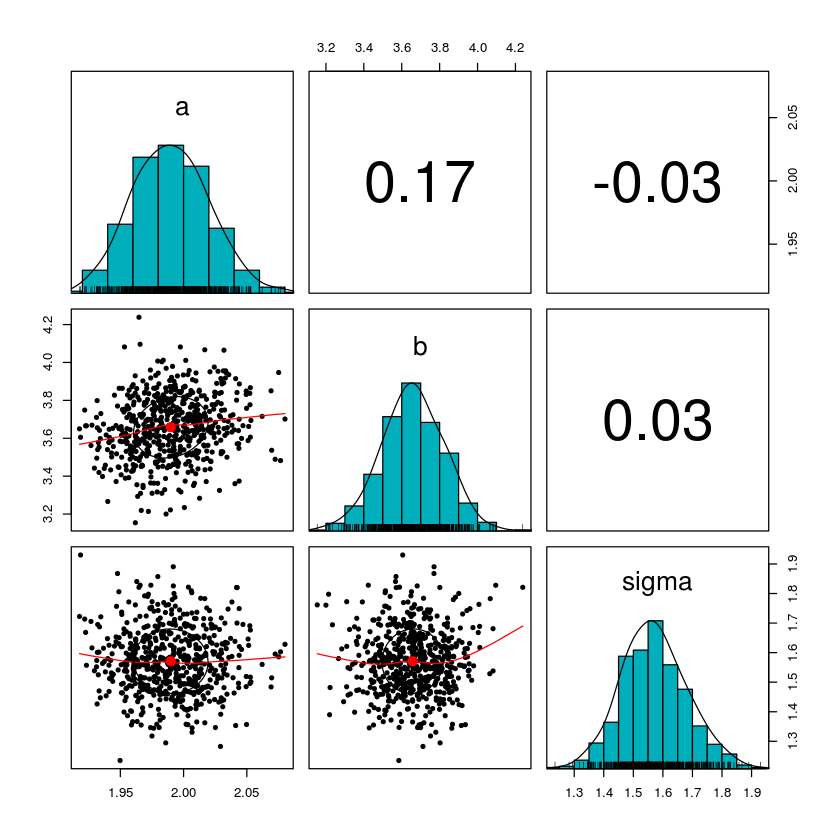

In [21]:
library(psych)

pairs.panels(tmp, 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
)


Finally, let's sample pairs of `a` and `b` parameters from the posterior and plot the corresponding linear regressors:

In [354]:
sample_rows <- sample.int(nrow(res),200,replace = TRUE)
sample <- res[sample_rows]


For each pair of `a` and `b`, predict the `y` of `x`:

In [355]:
ys = mapply(function(a,b) { lapply(x,function(x) a*x+ b)},a = sample$a,b = sample$b)

In [356]:
ys = unlist(do.call(rbind,ys))

In [357]:
linear_regressions = data.table(x = rep(x,100),y = ys, id = unlist(lapply(X = 1:length(x),function(x) rep(x,100))))

In the following figure, we plot the original data (points in black) with the linear regressors generated by taking 200 random samples of `a` and `b` (in blue). We can see that the variance of those regressors is very low and they fit the points regardless of their noise.

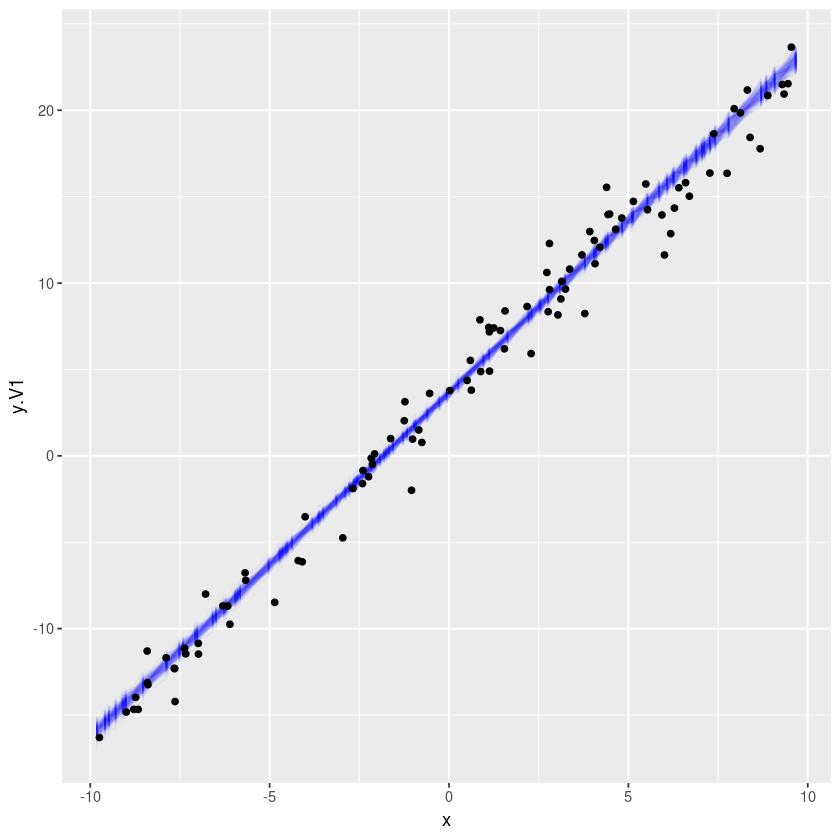

In [372]:
ggplot(linear_regressions) + geom_line(aes ( x = x,y = y.V1,group = id),alpha = 0.04,color = "blue") + geom_point(aes( x= x, y = y),data = data.table(x = x,y = y))